# Statistics and Visualisations

In [81]:
NAME = "Knudsen"
NAME = "Niedermayer"

In [82]:

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# unpickle the abnormal returns
df_abnormal_returns = pd.read_pickle(f"data/{NAME}/df_abnormal_returns.pkl")



# set plotting sizes
tick_size = 15
label_size = 20
title_size = 30
fig_height = 20

EVENT_INDEX = 20 # because 20 [0,..19] are before the event


investigation_periods = {
    "overall": (pd.Timestamp("2018-01-01"), pd.Timestamp("2021-12-31")),
    "pre-pandemic": (pd.Timestamp("2018-01-01"), pd.Timestamp("2020-02-29")),
    "pandemic": (pd.Timestamp("2020-03-01"), pd.Timestamp("2021-12-31")),
}

with open(f"data/{NAME}/companies.pkl", "rb") as f:
    companies = pickle.load(f)


### Having a look at all trade types together

In [83]:
types_of_interest = ["P - Purchase", "S - Sale", "S - Sale+OE"]
df_abnormal_returns.loc[:,:,types_of_interest,:]

0         1         2   \
Company i   TradeType    event_timestamp                                 
SLB     162 P - Purchase 2020-09-15      -0.006425 -0.006966  0.006025   
        163 P - Purchase 2020-08-06      -0.028556  0.021393 -0.012399   
        203 P - Purchase 2020-04-01      -0.047837  0.005169 -0.045674   
        204 P - Purchase 2020-03-10      -0.006840  0.005789  0.013451   
        205 P - Purchase 2020-02-05       0.000940 -0.035174  0.001796   
...                                            ...       ...       ...   
AMWL    103 S - Sale+OE  2021-04-26      -0.009985 -0.048226  0.000580   
        105 S - Sale+OE  2021-04-07       0.093020 -0.002059  0.044554   
        107 S - Sale+OE  2021-04-05      -0.030895  0.016408  0.092805   
        109 S - Sale+OE  2021-04-05      -0.030895  0.016408  0.092805   
        113 S - Sale+OE  2021-03-29       0.033394 -0.020390 -0.066476   

                                                3         4         5   \
Company i   TradeType    event_timestamp                                 
SLB     162 P - Purchase 2020-09-15      -0.040080 -0.008219  0.030018   
        163 P - Purchase 2020-08-06       0.060691 -0.019859  0.003671   
        203 P - Purchase 2020-04-01      -0.138943 -0.017392  0.038622   
        204 P - Purchase 2020-03-10      -0.003797 -0.004870 -0.012655   
        205 P - Purchase 2020-02-05       0.004768 -0.027833  0.008152   
...                                            ...       ...       ...   
AMWL    103 S - Sale+OE  2021-04-26       0.023735  0.045607 -0.044752   
        105 S - Sale+OE  2021-04-07      -0.012735 -0.042117 -0.026213   
        107 S - Sale+OE  2021-04-05      -0.002469  0.044214 -0.012877   
        109 S - Sale+OE  2021-04-05      -0.002469  0.044214 -0.012877   
        113 S - Sale+OE  2021-03-29      -0.041288 -0.035179  0.012723   

                                                6         7         8   \
Company i   TradeType    event_timestamp                                 
SLB     162 P - Purchase 2020-09-15      -0.017608 -0.035014 -0.000742   
        163 P - Purchase 2020-08-06      -0.014874 -0.005828  0.048371   
        203 P - Purchase 2020-04-01      -0.012035 -0.002455  0.079066   
        204 P - Purchase 2020-03-10       0.014845 -0.007954  0.000304   
        205 P - Purchase 2020-02-05      -0.033017 -0.001509 -0.016895   
...                                            ...       ...       ...   
AMWL    103 S - Sale+OE  2021-04-26       0.014382 -0.025092  0.002120   
        105 S - Sale+OE  2021-04-07      -0.039687 -0.080791  0.059266   
        107 S - Sale+OE  2021-04-05      -0.042235 -0.025787 -0.039812   
        109 S - Sale+OE  2021-04-05      -0.042235 -0.025787 -0.039812   
        113 S - Sale+OE  2021-03-29       0.089004 -0.006403  0.040329   

                                                9   ...        31        32  \
Company i   TradeType    event_timestamp            ...                       
SLB     162 P - Purchase 2020-09-15       0.025470  ... -0.015706 -0.037604   
        163 P - Purchase 2020-08-06      -0.025087  ... -0.007073  0.034318   
        203 P - Purchase 2020-04-01      -0.109329  ...  0.031486  0.024975   
        204 P - Purchase 2020-03-10      -0.013527  ... -0.058915 -0.040849   
        205 P - Purchase 2020-02-05      -0.026703  ... -0.000785 -0.009042   
...                                            ...  ...       ...       ...   
AMWL    103 S - Sale+OE  2021-04-26       0.020496  ... -0.012637 -0.008643   
        105 S - Sale+OE  2021-04-07      -0.056627  ...  0.035493  0.052942   
        107 S - Sale+OE  2021-04-05      -0.080247  ... -0.009980  0.045014   
        109 S - Sale+OE  2021-04-05      -0.080247  ... -0.009980  0.045014   
        113 S - Sale+OE  2021-03-29      -0.016629  ...  0.013629  0.010415   

                                                33        34        35  \
Company i   TradeType    event_timestamp                 

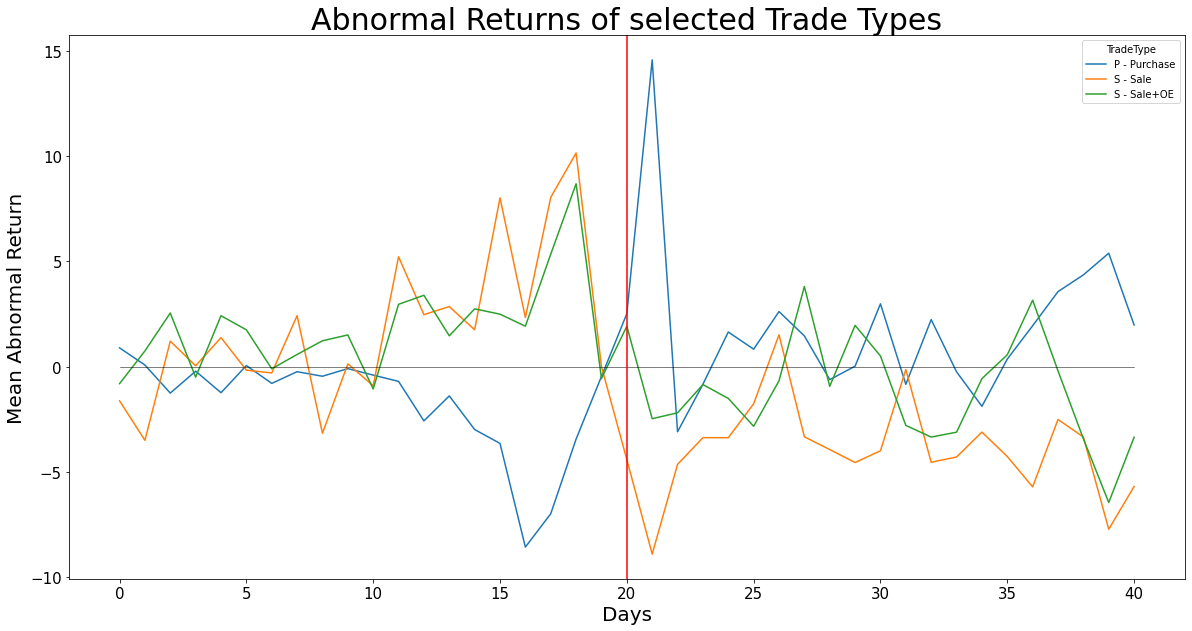

In [84]:

a = df_abnormal_returns.loc[:,:,types_of_interest,:].groupby(level=[2]).sum().transpose().plot(figsize=(fig_height, 10))
plt.plot(np.zeros(len(df_abnormal_returns.columns)), color="black", linewidth=0.5)
a.set_title("Abnormal Returns of selected Trade Types",fontsize=title_size)
a.set_xlabel("Days", fontsize=label_size)
a.set_ylabel("Mean Abnormal Return", fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.axvline(x = EVENT_INDEX, color = 'red', label = 'DD Event time', linewidth = 1.5)
plt.savefig(f"data/{NAME}/visualisations/AR_selected_tradetypes.png", dpi=600, bbox_inches='tight')

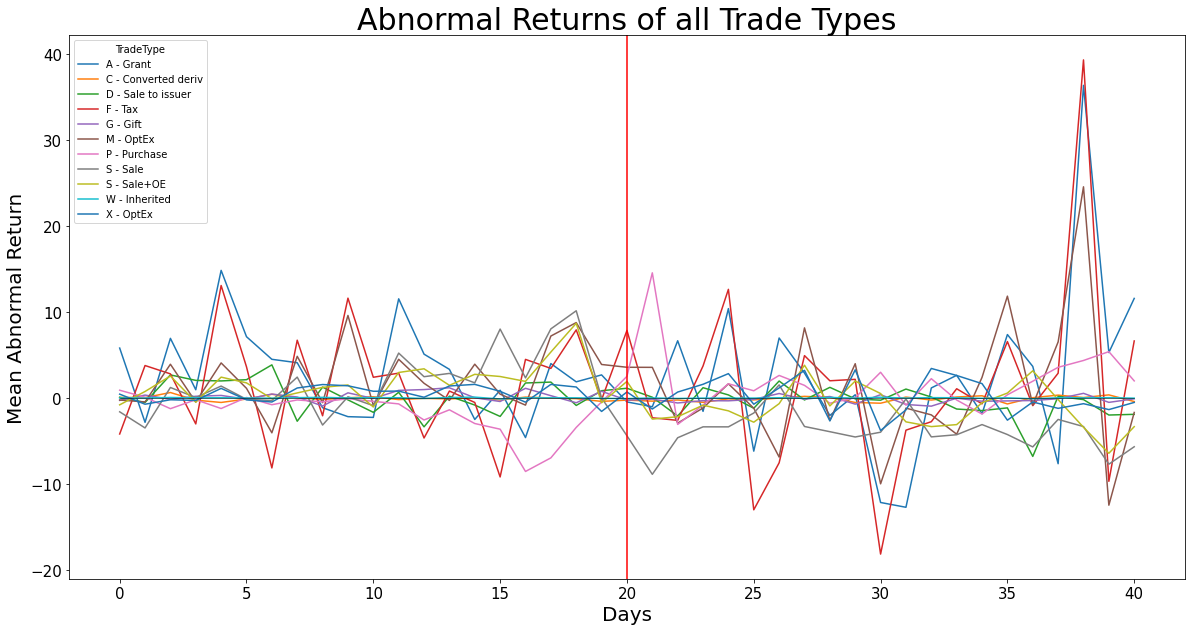

In [85]:
a = df_abnormal_returns.groupby(level=[2]).sum().transpose().plot(figsize=(fig_height, 10), fontsize=15)
plt.plot(np.zeros(len(df_abnormal_returns.columns)), color="black", linewidth=0.5)
a.set_title("Abnormal Returns of all Trade Types",fontsize=title_size)
a.set_xlabel("Days", fontsize=label_size)
a.set_ylabel("Mean Abnormal Return", fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.axvline(x = EVENT_INDEX, color = 'red', label = 'DD Event time', linewidth = 1.5)
plt.savefig(f"data/{NAME}/visualisations/AR_all_tradetypes.png", dpi=600, bbox_inches='tight')

In [86]:
df_abnormal_returns

0         1         2   \
Company i   TradeType           event_timestamp                                 
SLB     59  A - Grant           2021-12-21       0.014488  0.020009  0.004322   
        60  A - Grant           2021-12-21       0.014488  0.020009  0.004322   
        61  S - Sale            2021-12-09      -0.028087 -0.001870 -0.010602   
        62  F - Tax             2021-12-03       0.011502  0.001633  0.015117   
        63  M - OptEx           2021-12-03       0.011502  0.001633  0.015117   
...                                                   ...       ...       ...   
AMWL    107 S - Sale+OE         2021-04-05      -0.030895  0.016408  0.092805   
        108 C - Converted deriv 2021-04-05      -0.030895  0.016408  0.092805   
        109 S - Sale+OE         2021-04-05      -0.030895  0.016408  0.092805   
        112 M - OptEx           2021-03-29       0.033394 -0.020390 -0.066476   
        113 S - Sale+OE         2021-03-29       0.033394 -0.020390 -0.066476   

                                                       3         4         5   \
Company i   TradeType           event_timestamp                                 
SLB     59  A - Grant           2021-12-21       0.003310 -0.009099  0.023843   
        60  A - Grant           2021-12-21       0.003310 -0.009099  0.023843   
        61  S - Sale            2021-12-09       0.000851  0.003322 -0.009983   
        62  F - Tax             2021-12-03      -0.000682 -0.027669 -0.001546   
        63  M - OptEx           2021-12-03      -0.000682 -0.027669 -0.001546   
...                                                   ...       ...       ...   
AMWL    107 S - Sale+OE         2021-04-05      -0.002469  0.044214 -0.012877   
        108 C - Converted deriv 2021-04-05      -0.002469  0.044214 -0.012877   
        109 S - Sale+OE         2021-04-05      -0.002469  0.044214 -0.012877   
        112 M - OptEx           2021-03-29      -0.041288 -0.035179  0.012723   
        113 S - Sale+OE         2021-03-29      -0.041288 -0.035179  0.012723   

                                                       6         7         8   \
Company i   TradeType           event_timestamp                                 
SLB     59  A - Grant           2021-12-21       0.017127 -0.015654  0.016375   
        60  A - Grant           2021-12-21       0.017127 -0.015654  0.016375   
        61  S - Sale            2021-12-09       0.004347 -0.036822  0.013957   
        62  F - Tax             2021-12-03      -0.010316  0.001206  0.003654   
        63  M - OptEx           2021-12-03      -0.010316  0.001206  0.003654   
...                                                   ...       ...       ...   
AMWL    107 S - Sale+OE         2021-04-05      -0.042235 -0.025787 -0.039812   
        108 C - Converted deriv 2021-04-05      -0.042235 -0.025787 -0.039812   
        109 S - Sale+OE         2021-04-05      -0.042235 -0.025787 -0.039812   
        112 M - OptEx           2021-03-29       0.089004 -0.006403  0.040329   
        113 S - Sale+OE         2021-03-29       0.089004 -0.006403  0.040329   

                                                       9   ...        31  \
Company i   TradeType           event_timestamp            ...             
SLB     59  A - Grant           2021-12-21      -0.007811  ...  0.018661   
        60  A - Grant           2021-12-21      -0.007811  ...  0.018661   
        61  S - Sale            2021-12-09       0.019600  ... -0.014792   
        62  F - Tax             2021-12-03      -0.009554  ...  0.015301   
        63  M - OptEx           2021-12-03      -0.009554  ...  0.015301   
...                                                   ...  ...       ...   
AMWL    107 S - Sale+OE         2021-04-05      -0.080247  ... -0.009980   
        108 C - Converted deriv 2021-04-05      -0.080247  ... -0.009980   
        109 S - Sale+OE         2021-04-05      -0.080247  ... -0.009980   
        112 M - OptEx           2021-03-29      -0.016629

I think OE and OptEx means option exercise. "to exercise" means to put into effect the right to buy or sell the underlying security that is specified in the options contract." Can we be sure that the action does not shift the market, and the swing in return is really due to new information? Are these trades public, so maybe they are used as a signal for traders?

### Boxplot of the sum over all companies's AR

![alt text](assets/images/time_agg.png)

In our case it is not company i, but filing i

Types of trade to pick from:

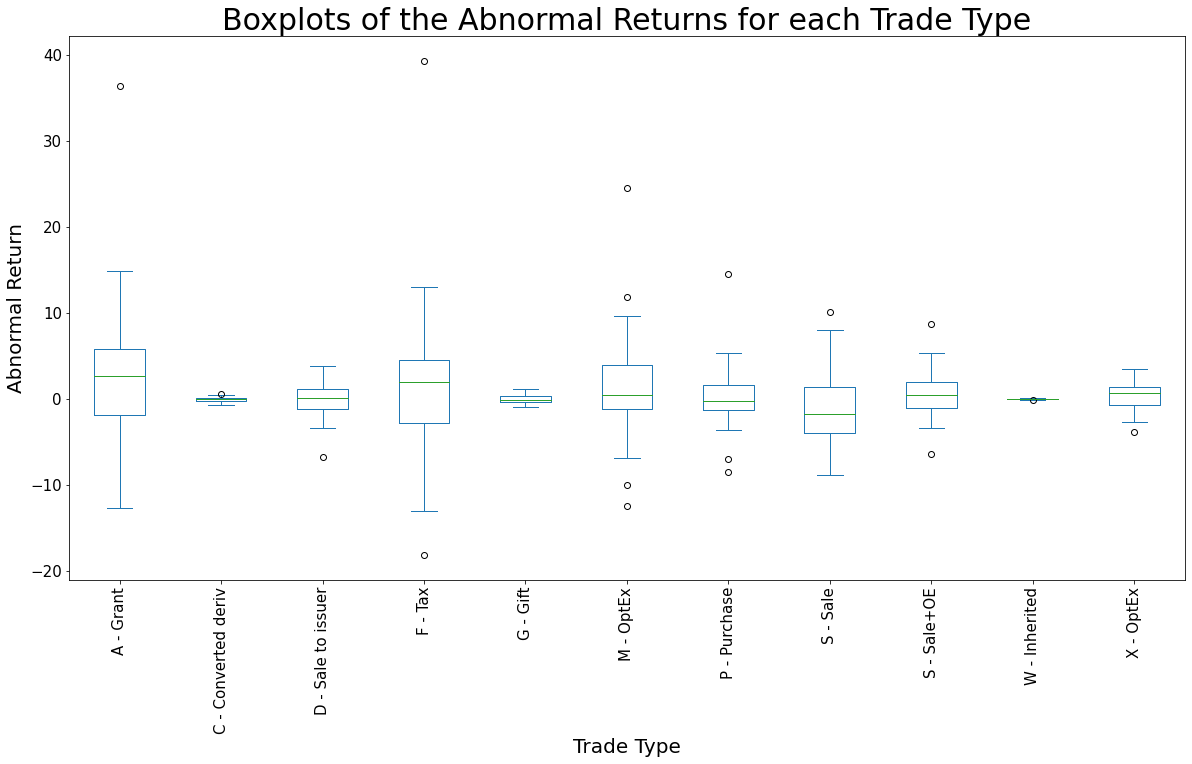

In [87]:
ax = df_abnormal_returns.groupby(level=[2]).sum().transpose().plot.box(rot=90, figsize=(fig_height, 10))
ax.set_title("Boxplots of the Abnormal Returns for each Trade Type",fontsize=title_size)
ax.set_xlabel("Trade Type", fontsize=label_size)
ax.set_ylabel("Abnormal Return", fontsize=label_size)

plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

plt.savefig(f"data/{NAME}/visualisations/AR_all_tradetypes_boxplot.png", dpi=600, bbox_inches='tight')

In [88]:
types = list(set([x[2] for x in df_abnormal_returns.index]))
types

['S - Sale',
 'D - Sale to issuer',
 'W - Inherited',
 'M - OptEx',
 'X - OptEx',
 'G - Gift',
 'C - Converted deriv',
 'F - Tax',
 'P - Purchase',
 'A - Grant',
 'S - Sale+OE']

Specify the type of the trades to investigate

In [89]:
type_ = "P - Purchase" # "S - Sale"
df_abnormal_returns_type = df_abnormal_returns.loc[:,:,type_]

The index describes the company and the index of the filing in the compnay, the columns represent the days in the event window

In [90]:
df_abnormal_returns_type

0         1         2         3         4   \
Company i   event_timestamp                                                     
SLB     162 2020-09-15      -0.006425 -0.006966  0.006025 -0.040080 -0.008219   
        163 2020-08-06      -0.028556  0.021393 -0.012399  0.060691 -0.019859   
        203 2020-04-01      -0.047837  0.005169 -0.045674 -0.138943 -0.017392   
        204 2020-03-10      -0.006840  0.005789  0.013451 -0.003797 -0.004870   
        205 2020-02-05       0.000940 -0.035174  0.001796  0.004768 -0.027833   
...                               ...       ...       ...       ...       ...   
AWK     43  2021-03-02       0.007055  0.003661  0.001505 -0.006486  0.005166   
        106 2020-05-15      -0.034063 -0.025919  0.014655 -0.001855 -0.029074   
        174 2019-06-04       0.000548  0.006923 -0.011392  0.005000  0.020375   
        227 2018-11-29      -0.020486 -0.005092 -0.011882  0.007088  0.008130   
        230 2018-11-14      -0.001830  0.006135  0.015308 -0.004681 -0.017435   

                                   5         6         7         8         9   \
Company i   event_timestamp                                                     
SLB     162 2020-09-15       0.030018 -0.017608 -0.035014 -0.000742  0.025470   
        163 2020-08-06       0.003671 -0.014874 -0.005828  0.048371 -0.025087   
        203 2020-04-01       0.038622 -0.012035 -0.002455  0.079066 -0.109329   
        204 2020-03-10      -0.012655  0.014845 -0.007954  0.000304 -0.013527   
        205 2020-02-05       0.008152 -0.033017 -0.001509 -0.016895 -0.026703   
...                               ...       ...       ...       ...       ...   
AWK     43  2021-03-02      -0.023572  0.006309  0.006722 -0.001292 -0.022366   
        106 2020-05-15      -0.009558 -0.018948 -0.001824 -0.035015 -0.014918   
        174 2019-06-04       0.033420 -0.012428  0.001848  0.003883  0.010894   
        227 2018-11-29       0.007853 -0.009227  0.007409  0.018924 -0.002843   
        230 2018-11-14       0.021323 -0.021624 -0.018528  0.013816  0.004548   

                             ...        31        32        33        34  \
Company i   event_timestamp  ...                                           
SLB     162 2020-09-15       ... -0.015706 -0.037604  0.035349  0.004609   
        163 2020-08-06       ... -0.007073  0.034318 -0.015851 -0.033045   
        203 2020-04-01       ...  0.031486  0.024975  0.009235  0.015305   
        204 2020-03-10       ... -0.058915 -0.040849 -0.050444 -0.077383   
        205 2020-02-05       ... -0.000785 -0.009042  0.007564 -0.017839   
...                          ...       ...       ...       ...       ...   
AWK     43  2021-03-02       ... -0.015449  0.002067 -0.004114  0.012100   
        106 2020-05-15       ...  0.003051 -0.006357 -0.014528 -0.024499   
        174 2019-06-04       ...  0.008917 -0.004315 -0.000052  0.003446   
        227 2018-11-29       ... -0.035961 -0.010778 -0.001148  0.002952   
        230 2018-11-14       ...  0.029980  0.000840  0.003230  0.015822   

                                   35        36        37        38        39  \
Company i   event_timestamp                                                     
SLB     162 2020-09-15      -0.007635 -0.010095  0.010523 -0.019471 -0.015459   
        163 2020-08-06       0.000960  0.028571 -0.003306 -0.019191 -0.009802   
        203 2020-04-01       0.076558 -0.038625 -0.038239 -0.000640  0.086175   
        204 2020-03-10       0.041312  0.016864  0.064009  0.064826 -0.019252   
        205 2020-02-05       0.024086  0.036242 -0.048656  0.010125 -0.066775   
...                               ...       ...       ...       ...       ...   
AWK     43  2021-03-02       0.036512  0.007443 -0.003616 -0.003278  0.012999   
        106 2020-05-15      -0.010994 -0.000542  0.012493  0.030744 -0.022107   
        174 2019-06-04      -0.007204 -0.015395 -0.003298  0.002205 -0.006237   
        227 2018-11-29      -0.017575 -0.052228

<AxesSubplot:>

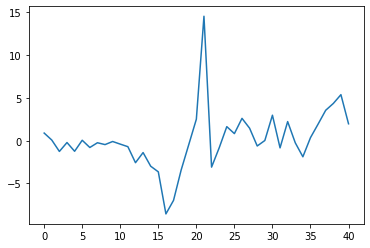

In [91]:
CAR = df_abnormal_returns_type.sum(axis=0)
CAR.plot()

![alt text](assets/images/cross_sectional_agg.png)


<AxesSubplot:>

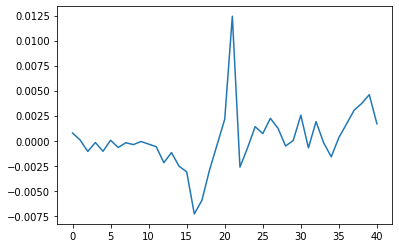

In [92]:
AR_bar = df_abnormal_returns_type.mean(axis=0) 
AR_bar.plot()

In [93]:
CAR_bar = AR_bar.sum()
CAR_bar

0.003724595825792087

In [94]:
# TODO var_CAR_bar = Does the definition make sense? It seems like we take the var of a scalar

![alt text](assets/images/cross_sectional_agg2.png)


In [95]:
CAR_bar_2 = CAR.mean()
CAR_bar_2

0.1063780905366472

In [96]:
# var car TODO not sure what just sigma means.

## Statistics

Check if CAR mean = 0 (t-test)

In [97]:

tt = stats.ttest_1samp(CAR, popmean=0)
tt

Ttest_1sampResult(statistic=0.19303334034706732, pvalue=0.8479096725282316)

Check if CAR median = 0 (wilcoxon signed rank test)

In [98]:
stats.wilcoxon(CAR)

WilcoxonResult(statistic=410.0, pvalue=0.7905115812513929)

In [99]:
types = types
investigation_periods = investigation_periods
multiind_p, data_p = [], []

event_day_ranges = {
    "before": (0,20), # TODO for now we drop the filing day itself
    "after": (21,41)
}

aggregation_type = {"name": "cross-sectional", "axis":0}
#aggregation_type = {"name": "through time", "axis":1}

for type_ in types:
    for per in investigation_periods.keys():
        for side in event_day_ranges.keys():
                
            event_day_range = event_day_ranges[side]
            df_abnormal_returns_type = df_abnormal_returns.loc[:,:,type_]
            per_left, per_right = investigation_periods[per]


            timestamps = df_abnormal_returns_type.index.get_level_values(2)
            mask = (timestamps >= per_left) & (timestamps <= per_right)
            df_AR_type_per = df_abnormal_returns_type[mask]
            if not len(df_AR_type_per):
                print(f"skipping iteration because of 0 datapoints {(type_, per, side)}")
                continue
            df_AR_type_per_side = df_AR_type_per.iloc[:,event_day_range[0]:event_day_range[1]]
            CAR = df_AR_type_per_side.mean(axis=aggregation_type["axis"])

            pvalue_ttest = round(stats.ttest_1samp(CAR, popmean=0).pvalue, 10)
            pvalue_wilcoxon = round(stats.wilcoxon(CAR).pvalue, 10)
            mean = CAR.mean()
            median = CAR.median()
            # calculate a 95% confidence interval
            left, right = stats.t.interval(0.95, len(CAR)-1, loc=np.mean(CAR), scale=stats.sem(CAR))
            left, right = round(left, 4), round(right, 4)
            CI = left, right
            
            multiind_p.append((type_, per, side))
            data_p.append((mean, pvalue_ttest, median, pvalue_wilcoxon, len(df_AR_type_per), CI))

skipping iteration because of 0 datapoints ('W - Inherited', 'pre-pandemic', 'before')
skipping iteration because of 0 datapoints ('W - Inherited', 'pre-pandemic', 'after')


In [100]:
# process abnormal returns
df_p = pd.DataFrame.from_records(data_p)
df_p.index = pd.MultiIndex.from_tuples(multiind_p, names=["TradeType", "Period", "Side"])
df_p.columns = ["mean", "ttest pvalue", "median", "wilcoxon pvalue", "sample_size", "95% CI"]
df_p.to_csv(f"data/{NAME}/{aggregation_type['name']}_tests_result.csv")
df_p.sort_values("ttest pvalue")

mean  ttest pvalue    median  \
TradeType          Period       Side                                       
S - Sale           overall      after  -0.001055  3.598000e-07 -0.001077   
                   pandemic     after  -0.001462  9.038800e-06 -0.001550   
                   pre-pandemic after  -0.000682  2.739310e-05 -0.000578   
P - Purchase       pre-pandemic before -0.001452  2.689813e-04 -0.001239   
S - Sale+OE        pre-pandemic before  0.000801  8.515093e-04  0.001018   
...                                          ...           ...       ...   
M - OptEx          pre-pandemic after   0.000093  7.907633e-01 -0.000285   
A - Grant          pandemic     before  0.000054  8.097195e-01  0.000080   
D - Sale to issuer pandemic     before  0.000214  8.304768e-01 -0.000280   
W - Inherited      pandemic     before -0.000683  8.483921e-01  0.001043   
                   overall      before -0.000683  8.483921e-01  0.001043   

                                        wilcoxon pvalue  sample_size  \
TradeType          Period       Side                                   
S - Sale           overall      after          0.000006         3685   
                   pandemic     after          0.000048         1761   
                   pre-pandemic after          0.000010         1924   
P - Purchase       pre-pandemic before         0.000261          533   
S - Sale+OE        pre-pandemic before         0.001017          943   
...                                                 ...          ...   
M - OptEx          pre-pandemic after          0.898317         2581   
A - Grant          pandemic     before         0.728506         4886   
D - Sale to issuer pandemic     before         0.812355          176   
W - Inherited      pandemic     before         0.898317            3   
                   overall      before         0.898317            3   

                                                    95% CI  
TradeType          Period       Side                        
S - Sale           overall      after   (-0.0013, -0.0008)  
                   pandemic     after     (-0.002, -0.001)  
                   pre-pandemic after   (-0.0009, -0.0004)  
P - Purchase       pre-pandemic before  (-0.0021, -0.0008)  
S - Sale+OE        pre-pandemic before    (0.0004, 0.0012)  
...                                                    ...  
M - OptEx          pre-pandemic after    (-0.0006, 0.0008)  
A - Grant          pandemic     before   (-0.0004, 0.0005)  
D - Sale to issuer pandemic     before   (-0.0019, 0.0023)  
W - Inherited      pandemic     before   (-0.0081, 0.0067)  
                   overall      before   (-0.0081, 0.0067)  

[64 rows x 6 columns]

In [101]:
df_p.loc["S - Sale"]

mean  ttest pvalue    median  wilcoxon pvalue  \
Period       Side                                                        
overall      before  0.000492  3.776072e-02  0.000350         0.063723   
             after  -0.001055  3.598000e-07 -0.001077         0.000006   
pre-pandemic before  0.000314  1.031252e-02  0.000302         0.010689   
             after  -0.000682  2.739310e-05 -0.000578         0.000010   
pandemic     before  0.000687  1.290552e-01  0.000176         0.311794   
             after  -0.001462  9.038800e-06 -0.001550         0.000048   

                     sample_size              95% CI  
Period       Side                                     
overall      before         3685        (0.0, 0.001)  
             after          3685  (-0.0013, -0.0008)  
pre-pandemic before         1924    (0.0001, 0.0005)  
             after          1924  (-0.0009, -0.0004)  
pandemic     before         1761   (-0.0002, 0.0016)  
             after          1761    (-0.002, -0.001)

#### Export information to latex

In [102]:
counter = 0
for t in types:
    counter = counter+1
    #print(t)
    df_ = df_p.loc[t,:,:]
    df_ = df_.rename(columns={'Side of the event': 'Side'
                              , 'mean': 'mean'
                              , 'ttest pvalue': 'ttest'
                              , 'median': 'median'
                              , 'wilcoxon pvalue': 'Wilcoxon'
                              , 'sample_size': 'N'})
    #display(df_)
    
    latex = df_.drop(columns=["95% CI"])\
    .to_latex( column_format="llrrrrr"
              , position="H"
              , label=f"table:t{counter}_hypothesistest"
              , caption= f"Hypothesis tests for type: {t}"
              #, index = False
    )
    print(latex)

C:\Users\Tom\AppData\Local\Temp\ipykernel_14772\3459092443.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex = df_.drop(columns=["95% CI"])\
C:\Users\Tom\AppData\Local\Temp\ipykernel_14772\3459092443.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex = df_.drop(columns=["95% CI"])\
C:\Users\Tom\AppData\Local\Temp\ipykernel_14772\3459092443.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler

\begin{table}[H]
\centering
\caption{Hypothesis tests for type: S - Sale}
\label{table:t1_hypothesistest}
\begin{tabular}{llrrrrr}
\toprule
         &       &      mean &         ttest &    median &  Wilcoxon &     N \\
Period & Side &           &               &           &           &       \\
\midrule
overall & before &  0.000492 &  3.776072e-02 &  0.000350 &  0.063723 &  3685 \\
         & after & -0.001055 &  3.598000e-07 & -0.001077 &  0.000006 &  3685 \\
pre-pandemic & before &  0.000314 &  1.031252e-02 &  0.000302 &  0.010689 &  1924 \\
         & after & -0.000682 &  2.739310e-05 & -0.000578 &  0.000010 &  1924 \\
pandemic & before &  0.000687 &  1.290552e-01 &  0.000176 &  0.311794 &  1761 \\
         & after & -0.001462 &  9.038800e-06 & -0.001550 &  0.000048 &  1761 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}[H]
\centering
\caption{Hypothesis tests for type: D - Sale to issuer}
\label{table:t2_hypothesistest}
\begin{tabular}{llrrrrr}
\toprule
         &       & 

C:\Users\Tom\AppData\Local\Temp\ipykernel_14772\3459092443.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex = df_.drop(columns=["95% CI"])\
C:\Users\Tom\AppData\Local\Temp\ipykernel_14772\3459092443.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex = df_.drop(columns=["95% CI"])\


### Visualise CI

# Time based aggregation

In order to compare pre-pandemic and pandemic time, we cannot do aggregation through time because then we cannot carry out hypothesis tests. Therefore we aggregate the data in time and do a 2 sample t test

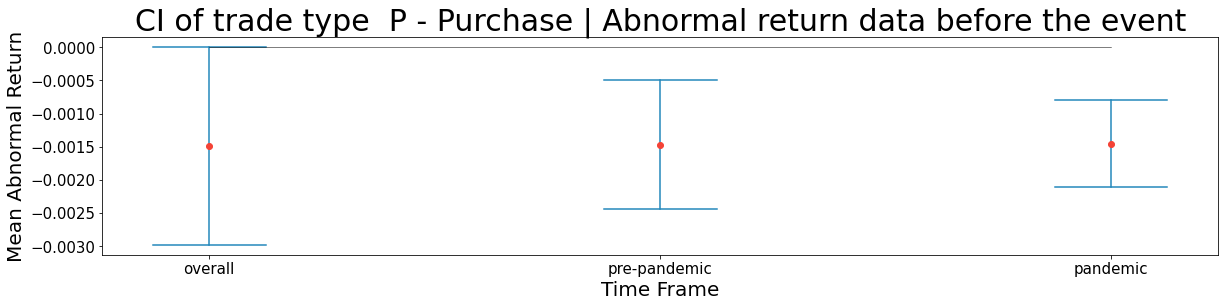

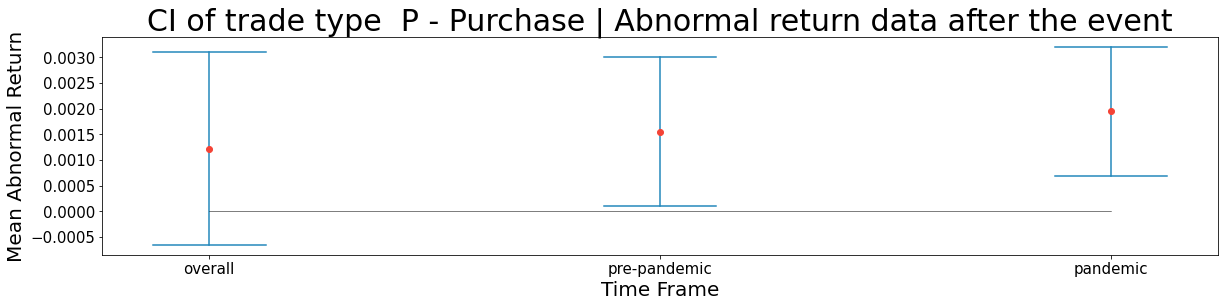

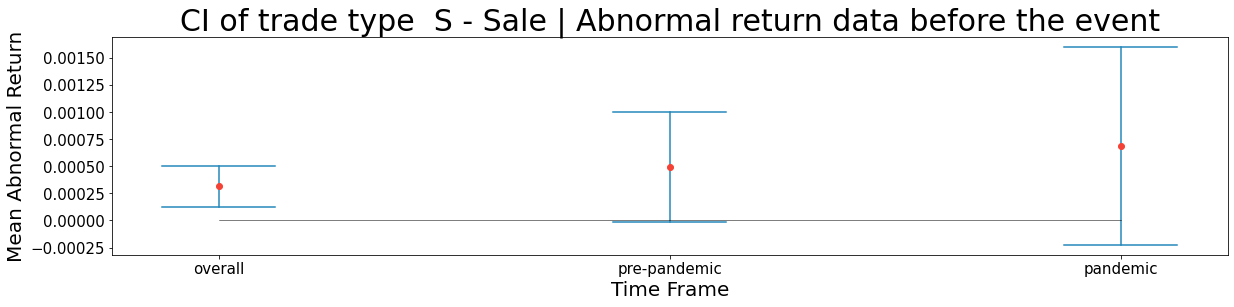

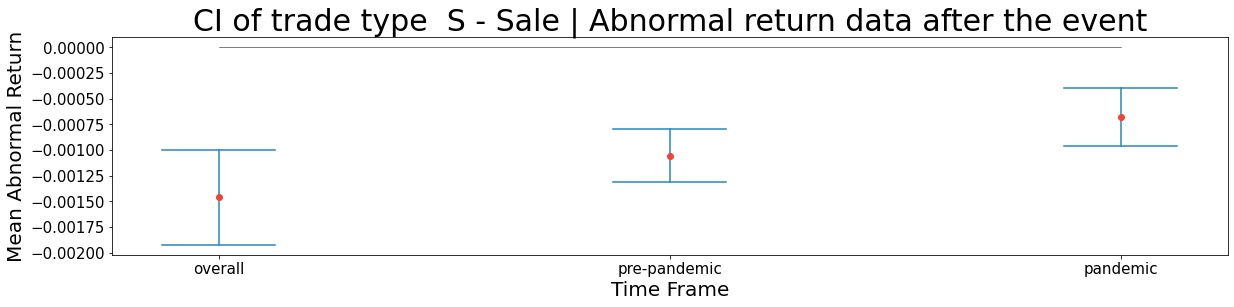

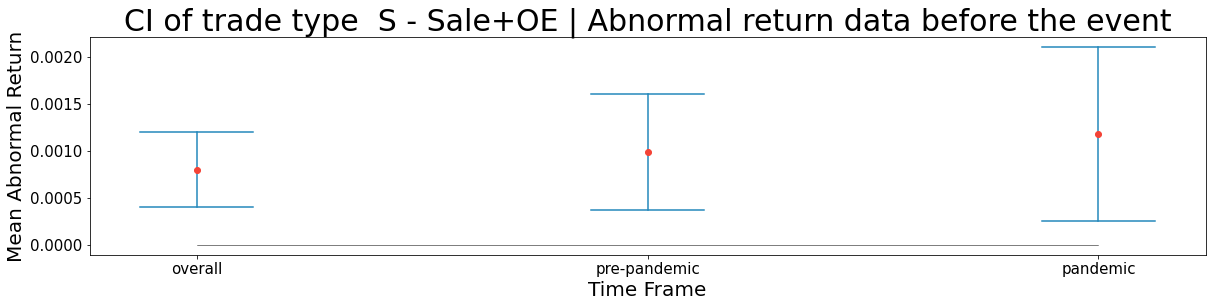

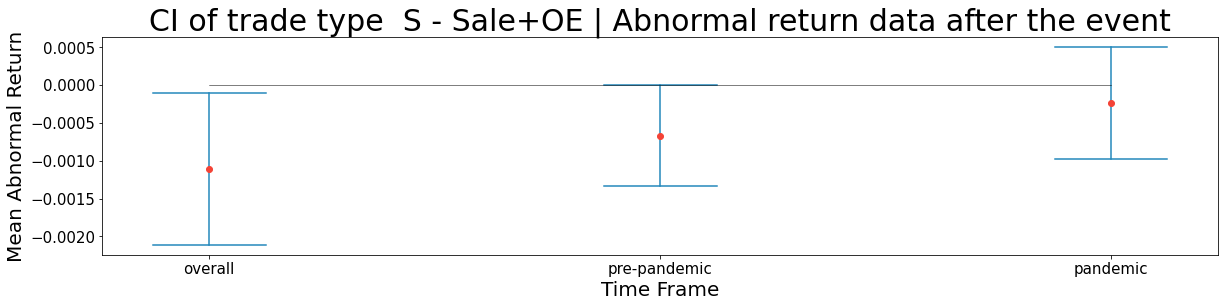

In [103]:
# purcase, sale and sale with oe
for t in types_of_interest:
    for side in event_day_ranges.keys():

        df_ = df_p.loc[t,:,side]

        def plot_confidence_interval(x, mean, CI, color='#2187bb', horizontal_line_width=0.25):


            left = x - horizontal_line_width / 2
            top = mean - CI
            right = x + horizontal_line_width / 2
            bottom = mean + CI
            plt.plot([x, x], [top, bottom], color=color)
            plt.plot([left, right], [top, top], color=color)
            plt.plot([left, right], [bottom, bottom], color=color)
            plt.plot(x, mean, 'o', color='#f44336')

            return mean, CI

        plt.figure(figsize=(fig_height,4))

        df_to_plot = df_
        for i, row in enumerate(df_to_plot.sort_values("mean").itertuples()):
            mean, CI = plot_confidence_interval(i, row[1], row[6][1] - row[1])

        plt.plot(np.zeros(len(df_to_plot)), color="black", linewidth=0.5)
        plt.xticks(range(len(df_to_plot)), df_to_plot.index, fontsize=tick_size)
        plt.yticks(fontsize=tick_size)

        if side == "before":
            side_desc = "before the event"
        else:
            side_desc = "after the event"

        plt.title(f'CI of trade type  {t} | Abnormal return data {side_desc}', fontsize=title_size)

        plt.xlabel('Time Frame', fontsize=label_size)
        plt.ylabel('Mean Abnormal Return', fontsize=label_size)

        plt.xticks(fontsize=tick_size)
        plt.yticks(fontsize=tick_size)
        plt.savefig(f"data/{NAME}/visualisations/CI_{t}_{side}.png", dpi=600, bbox_inches='tight')
        plt.show()

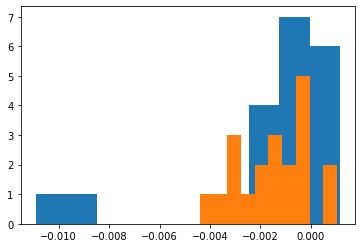

For type P - Purchase, in the days before of the event, the pre-pandemic and pandemic mean of abnormal returns is different with a p-value of 0.9601143873


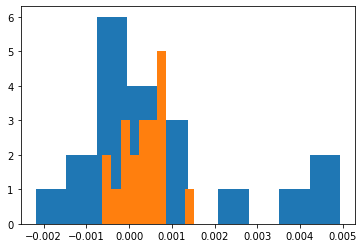

For type S - Sale, in the days before of the event, the pre-pandemic and pandemic mean of abnormal returns is different with a p-value of 0.4086551079


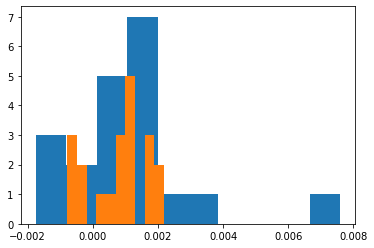

For type S - Sale+OE, in the days before of the event, the pre-pandemic and pandemic mean of abnormal returns is different with a p-value of 0.4410903049


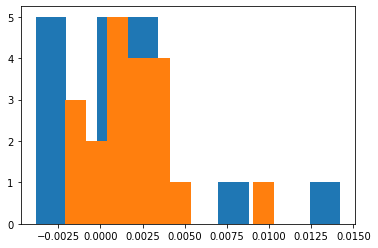

For type P - Purchase, in the days after of the event, the pre-pandemic and pandemic mean of abnormal returns is different with a p-value of 0.5053307201


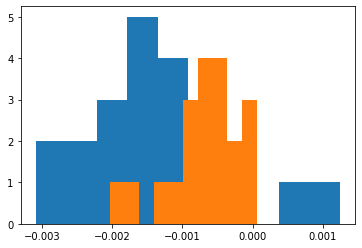

For type S - Sale, in the days after of the event, the pre-pandemic and pandemic mean of abnormal returns is different with a p-value of 0.0069925624


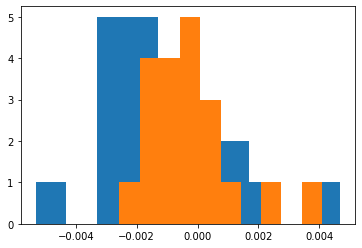

For type S - Sale+OE, in the days after of the event, the pre-pandemic and pandemic mean of abnormal returns is different with a p-value of 0.141989916


In [104]:
time_aggregated = df_abnormal_returns.sum(axis=1)#.transpose()
matrix_data = dict()

for side in event_day_ranges.keys():
    d = {}
    for t in types_of_interest:

        event_day_range = event_day_ranges[side]
        df_abnormal_returns_type = df_abnormal_returns.loc[:,:,t]

        timestamps = df_abnormal_returns_type.index.get_level_values(2)

        df_AR_type_side = df_abnormal_returns_type.iloc[:,event_day_range[0]:event_day_range[1]]


        pand_start, pand_end = investigation_periods["pandemic"][0], investigation_periods["pandemic"][1]
        prepand_start, prepand_end = investigation_periods["pre-pandemic"][0], investigation_periods["pre-pandemic"][1]

        mask_pand = (timestamps >= pand_start) & (timestamps <= pand_end)
        mask_prepand = (timestamps >= prepand_start) & (timestamps <= prepand_end)


        df_AR_type_side_pand_agg = df_AR_type_side[mask_pand].mean(axis=0)
        df_AR_type_side_prepand_agg = df_AR_type_side[mask_prepand].mean(axis=0)
        plt.hist(df_AR_type_side_pand_agg)
        plt.hist(df_AR_type_side_prepand_agg)
        plt.show()

        tt = stats.ttest_ind(a=df_AR_type_side_prepand_agg, b=df_AR_type_side_pand_agg)
        print(f"For type {t}, in the days {side} of the event, the pre-pandemic and pandemic mean of abnormal returns is different with a p-value of {round(tt.pvalue, 10)}")

        d.update({t:tt.pvalue})

    matrix_data[side] = d

### P-values of whether pre-pandemic and pandemic are significantly different for the timeframe before and after the event and different types

In [105]:
print(pd.DataFrame.from_dict(matrix_data).to_latex())

\begin{tabular}{lrr}
\toprule
{} &    before &     after \\
\midrule
P - Purchase &  0.960114 &  0.505331 \\
S - Sale     &  0.408655 &  0.006993 \\
S - Sale+OE  &  0.441090 &  0.141990 \\
\bottomrule
\end{tabular}



C:\Users\Tom\AppData\Local\Temp\ipykernel_14772\2748460316.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame.from_dict(matrix_data).to_latex())


Specify the type of the trades to investigate

### Visualize how active Directors Dealings Are
Should move this to somewhere else
Want visual confirmation that Directors have changed behaviour during the times of Covid (Hypothesis 3)

In [107]:
all_insider_trades = companies[0].insider_data_df.head(0)
from tqdm import tqdm
#for j in tqdm(range(len(companies[:200]))):
for j in tqdm(range(len(companies))):
    all_insider_trades = pd.concat([all_insider_trades, companies[j].insider_data_df])#  @ gunnar very nice asymptotic runtime

100%|██████████| 1534/1534 [00:23<00:00, 64.73it/s]


In [ ]:
all_insider_trades['FilingDateTrunc'] = all_insider_trades['FilingDate'].dt.date
all_insider_trades.groupby('FilingDateTrunc')['FilingDate'].count().plot()

In [ ]:
all_insider_trades.to_csv('AllTradesForExcelGSK.csv')

In [ ]:
all_insider_trades.groupby('FilingDateTrunc')['Value'].sum().plot()

In [ ]:
all_insider_trades.groupby('FilingDateTrunc')['Value'].mean().plot()

In [ ]:
plt.hist(all_insider_trades['FilingDateTrunc'])